<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Datascience-assignments-6-to-10/blob/main/Clustering(Crimedata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
path = r"/content/crime_data.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
features = data.iloc[:, 1:].values

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(scaled_features)

In [7]:
scores = []
max_clusters = 10
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

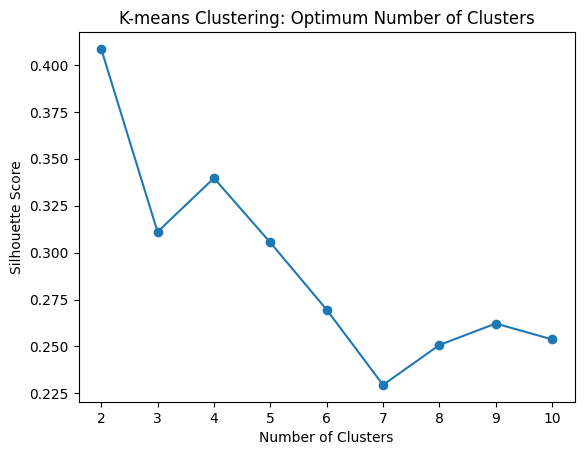

In [8]:
plt.plot(range(2, max_clusters + 1), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Optimum Number of Clusters')
plt.show()

In [9]:
optimum_clusters = scores.index(max(scores)) + 2  # +2 to account for range start at 2
kmeans = KMeans(n_clusters=optimum_clusters, init='k-means++')
kmeans_labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [11]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Assault (scaled)')

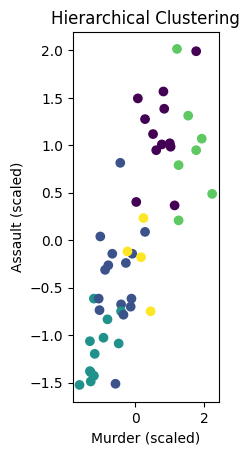

In [12]:
plt.subplot(1, 3, 1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=hc_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Murder (scaled)')
plt.ylabel('Assault (scaled)')

Text(0, 0.5, 'Assault (scaled)')

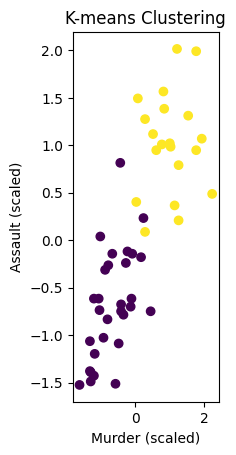

In [13]:
plt.subplot(1, 3, 2)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Murder (scaled)')
plt.ylabel('Assault (scaled)')

Text(0, 0.5, 'Assault (scaled)')

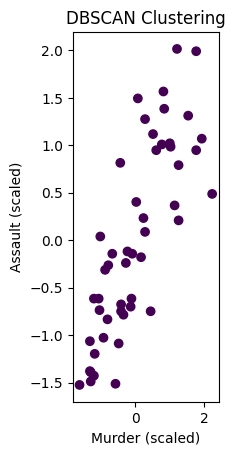

In [14]:
plt.subplot(1, 3, 3)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Murder (scaled)')
plt.ylabel('Assault (scaled)')

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

The optimum number of clusters is 7.